# Notebook ICD - 13

### Library

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### Dataset

In [3]:
df = pd.read_csv(r'weather.numeric.csv')

Show dataset

In [4]:
print(df)

    Day   Outlook  Temperature  Humidity    Wind   Play
0     1     sunny           85        85    weak  False
1     2     sunny           80        90  strong  False
2     3  overcast           83        86    weak   True
3     4      rain           70        96    weak   True
4     5      rain           68        80    weak   True
5     6      rain           65        70  strong  False
6     7  overcast           64        65  strong   True
7     8     sunny           72        95    weak  False
8     9     sunny           69        70    weak   True
9    10      rain           75        80    weak   True
10   11     sunny           75        70  strong   True
11   12  overcast           72        90  strong   True
12   13  overcast           81        75    weak   True
13   14      rain           71        91  strong  False


In [5]:
# defining the dependent and independent variables
X_train = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y_train = df[['Play']]

print(X_train.head())
print(y_train.head())

    Outlook  Temperature  Humidity    Wind
0     sunny           85        85    weak
1     sunny           80        90  strong
2  overcast           83        86    weak
3      rain           70        96    weak
4      rain           68        80    weak
    Play
0  False
1  False
2   True
3   True
4   True


### From categorical to numeric

Scikit-learn uses an optimized version of the CART algorithm; however, the scikit-learn implementation does not support categorical variables for now

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

outlook = X_train.iloc[:,0]
outlook_enc = encoder.fit_transform(outlook)
print(outlook.tolist())
print(outlook_enc)

wind = X_train.iloc[:,3]
wind_enc = encoder.fit_transform(wind)
print(wind.tolist())
print(wind_enc)

['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain']
[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong']
[1 0 1 1 1 0 0 1 1 1 0 0 1 0]


In [42]:
df_outlook = pd.DataFrame(outlook_enc, columns = ['Outlook'])
df_wind = pd.DataFrame(outlook_enc, columns = ['Wind'])
X_train_num = pd.concat([df_outlook, X_train.iloc[:,1], X_train.iloc[:,2], df_wind], axis=1)
print(X_train_num)

    Outlook  Temperature  Humidity  Wind
0         2           85        85     2
1         2           80        90     2
2         0           83        86     0
3         1           70        96     1
4         1           68        80     1
5         1           65        70     1
6         0           64        65     0
7         2           72        95     2
8         2           69        70     2
9         1           75        80     1
10        2           75        70     2
11        0           72        90     0
12        0           81        75     0
13        1           71        91     1


### Generación del modelo

In [ ]:
clf = DecisionTreeClassifier().fit(X_train_num, y_train)

Visualizing the model

In [ ]:
from sklearn import tree
features = X_train_num.columns.values.tolist()
text_representation = tree.export_text(clf,
                                      feature_names = features)
print(text_representation)

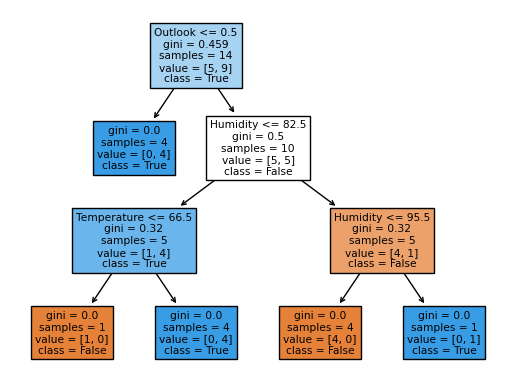

In [67]:
from matplotlib import pyplot as plt
fig = tree.plot_tree(clf, 
                   feature_names = X_train_num.columns.values,
                   class_names = ['False','True'],
                   filled=True)

### Evaluando modelo con nueva instancia

In [44]:
# sunny:2, hot:85, normal:65, strong:0 
new_example = [[2, 85, 65, 0]]
X_test = pd.DataFrame(new_example, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind'])
print(X_test)
clf.predict(X_test)

   Outlook  Temperature  Humidity  Wind
0        2           85        65     0


array([ True])

In [70]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(iris.target_names)
print(iris['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
